<a href="https://colab.research.google.com/github/ShoaibFarooqui/Face-Classification/blob/Shoaib/face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Classification
40 sample demonstration identifying Individuals using a Recurrent Neural Network

## Reference
 F. Samaria and A. Harter 
  "Parameterisation of a stochastic model for human face identification"
  2nd IEEE Workshop on Applications of Computer Vision
  December 1994, Sarasota (Florida).

In [1]:
# Data Import
import zipfile
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
np.random.seed(1)

# Machine Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

# Model Visualization
%matplotlib inline
from IPython.display import Image as img
from IPython.display import SVG

In [2]:
# compressed file extraction after zip import
zip_path = '/content/data.zip'
extract_path = '/content/extracted_files/'
with zipfile.ZipFile(zip_path, 'r') as zip:
  zip.extractall(extract_path)

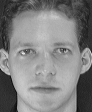

(92, 112)


In [3]:
# sample image display
face_sample = Image.open('/content/extracted_files/data/s1/1.pgm')
display(face_sample)
print(f'{face_sample.size}')

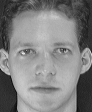

In [4]:
# convert to color
face_sample.save('pngTest.png')
display(face_sample)

In [5]:
# def function that opens a given sample (s# folder)
def sample_collect(sample_directory):
  pgm_images = []
  for pgm_image in os.scandir(sample_directory):
    if pgm_image.name.endswith('.pgm'):
      pgm_images.append(pgm_image.path)
  
  # for image_file in pgm_images:
  #   Image.open(image_file).show()
  
  return pgm_images

In [6]:
# demo sample_col() function
sample_collect('/content/extracted_files/data/s6')  

['/content/extracted_files/data/s6/6.pgm',
 '/content/extracted_files/data/s6/7.pgm',
 '/content/extracted_files/data/s6/3.pgm',
 '/content/extracted_files/data/s6/8.pgm',
 '/content/extracted_files/data/s6/9.pgm',
 '/content/extracted_files/data/s6/10.pgm',
 '/content/extracted_files/data/s6/5.pgm',
 '/content/extracted_files/data/s6/2.pgm',
 '/content/extracted_files/data/s6/4.pgm',
 '/content/extracted_files/data/s6/1.pgm']

In [7]:
# collect all images
all_images = {}

s_folder = np.arange(1,41,1)
for i in s_folder:
  s_folder_path = f'/content/extracted_files/data/s{i}'
  sample_image_list = sample_collect(s_folder_path)
  all_images[i] = sample_image_list


In [8]:
# convert all_images dictionary to dataframe 'df_combined'
dfs = []
for key, values in all_images.items():
  dframe = pd.DataFrame({'Person ID (labels)': key, 'Image Path (features)': values})
  dfs.append(dframe)
df = pd.concat(dfs, ignore_index=True)
df

,Person ID (labels),Image Path (features)
0,1,/content/extracted_files/data/s1/6.pgm
1,1,/content/extracted_files/data/s1/7.pgm
2,1,/content/extracted_files/data/s1/3.pgm
3,1,/content/extracted_files/data/s1/8.pgm
4,1,/content/extracted_files/data/s1/9.pgm
...,...,...
395,40,/content/extracted_files/data/s40/10.pgm
396,40,/content/extracted_files/data/s40/5.pgm
397,40,/content/extracted_files/data/s40/2.pgm
398,40,/content/extracted_files/data/s40/4.pgm


In [9]:
# find smallest image
res=[]

for i in df['Image Path (features)']:
  resolution = Image.open(i).size
  res.append(resolution)

unique_res = set(res)
print(unique_res)

{(92, 112)}


...all the images are already the same size

## Lossless compression Function compressData() to one dimensional array of normalized greyscale

In [10]:
# Iterate over every photo for pixel array
def compressData(List_of_Dir):

  one_dimensional_array_list = []
  image_size = (92, 112)

  for photo_path in List_of_Dir:
    image = Image.open(photo_path)
    pixel_arr = np.array(image)

      # normalization
    pixel_arr = pixel_arr / 255.0

    # Flatten to one dimension
    pixel_count = pixel_arr.shape[0] * pixel_arr.shape[1]
    pixel_arr = pixel_arr.reshape(pixel_count)
    one_dimensional_array_list.append(pixel_arr)
  
  data_prep = np.array(one_dimensional_array_list)
  return data_prep


## One Hot Encoding Labels
Labels for training and dataset are encoded to a binary array for every class.

### Why `labels-1` ?

The num_classes argument specifies 40 classes but the provided arrays' indices on unique labels is listed from 0 to 39. Not 1 to 40

In [11]:
def encoder(labels):
  labels_encoded = to_categorical(labels-1)
  return labels_encoded

In [12]:
# Split test and train image paths
X = compressData(df["Image Path (features)"])
y = encoder(df['Person ID (labels)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

def model_data():
  print(f'''
    Training Data Info:

    Training Dataset
    Features Data Shape: {X_train.shape}
    Labels Data Shape: {y_train.shape}

    Test Dataset
    Features Data Shape: {X_test.shape}
    Labels Data Shape: {y_test.shape}
  ''')

model_data()


    Training Data Info:

    Training Dataset
    Features Data Shape: (300, 10304)
    Labels Data Shape: (300, 40)

    Test Dataset
    Features Data Shape: (100, 10304)
    Labels Data Shape: (100, 40)
  


## One Hot Encoding Labels

In [13]:
x = np.array([[1,2,3],[4,5,6]])

print(f'{x.shape}')

print(x)

print(f'{[row[1] for row in x]}')

(2, 3)
[[1 2 3]
 [4 5 6]]
[2, 5]


In [14]:
labels = np.unique(y_train)
print(y_train.shape)
print(labels)
len([label for label in labels])

(300, 40)
[0. 1.]


2

## Creating the Model



In [16]:
model = Sequential()

In [17]:
# First hidden layer
model.add(Dense(100, activation='relu', input_dim=10304))

In [18]:
# Second hidden layer
model.add(Dense(100, activation='relu'))

In [19]:
# Output layer
model.add(Dense(40, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1030500   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 40)                4040      
                                                                 
Total params: 1,044,640
Trainable params: 1,044,640
Non-trainable params: 0
_________________________________________________________________


## Compile and Train Our Model

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=50,
    shuffle=True,
    verbose=2
)



/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
10/10 - 1s - loss: 4.1199 - accuracy: 0.0233 - 1s/epoch - 150ms/step
Epoch 2/50
10/10 - 1s - loss: 3.6456 - accuracy: 0.0667 - 1s/epoch - 138ms/step
Epoch 3/50
10/10 - 1s - loss: 3.4674 - accuracy: 0.0833 - 930ms/epoch - 93ms/step
Epoch 4/50
10/10 - 1s - loss: 3.2975 - accuracy: 0.1267 - 950ms/epoch - 95ms/step
Epoch 5/50
10/10 - 1s - loss: 3.1264 - accuracy: 0.1567 - 1s/epoch - 131ms/step
Epoch 6/50
10/10 - 2s - loss: 2.9020 - accuracy: 0.1867 - 2s/epoch - 152ms/step
Epoch 7/50
10/10 - 2s - loss: 2.6040 - accuracy: 0.2633 - 2s/epoch - 157ms/step
Epoch 8/50
10/10 - 1s - loss: 2.2813 - accuracy: 0.3633 - 688ms/epoch - 69ms/step
Epoch 9/50
10/10 - 1s - loss: 1.9255 - accuracy: 0.5333 - 540ms/epoch - 54ms/step
Epoch 10/50
10/10 - 1s - loss: 1.7565 - accuracy: 0.5633 - 553ms/epoch - 55ms/step
Epoch 11/50
10/10 - 1s - loss: 1.5913 - accuracy: 0.5733 - 615ms/epoch - 62ms/step
Epoch 12/50
10/10 - 1s - loss: 1.3188 - accuracy: 0.6600 - 573ms/epoch - 57ms/step
Epoch 13/50
10/10 - 1s 

In [23]:
model.save("face_trained.h5")

## Testing Model with Test Dataset

In [24]:
model = load_model("face_trained.h5")

In [25]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'''
  Loss: {model_loss}
  Acc: {model_accuracy}
''')

4/4 - 0s - loss: 0.4867 - accuracy: 0.8200 - 85ms/epoch - 21ms/step

  Loss: 0.48667392134666443
  Acc: 0.8199999928474426

